# EDA of Kickstarter Projects

### In this exploratory data analysis I will try to find out a few interesting insights about kickstarter projects.


## Import all nesesery libraries

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/kickstarter-projects/ks-projects-201801.csv
/kaggle/input/kickstarter-projects/ks-projects-201612.csv


## Import the dataset, parse the date and time and describe the data

In [191]:
raw = pd.read_csv("/kaggle/input/kickstarter-projects/ks-projects-201801.csv")
raw.deadline = pd.to_datetime(raw.deadline, format="%Y/%m/%d").dt.date
raw.launched = pd.to_datetime(raw.launched, format="%Y/%m/%d").dt.date

### Add some useful columns

In [192]:
df = raw.drop(['ID','goal','pledged','usd_pledged_real'],axis=1)
df["duration_days"]= (df.deadline - df.launched).dt.days
df['launch_year']=pd.to_datetime(raw['launched'], format="%Y/%m/%d").dt.year
df.head()

,name,category,main_category,currency,deadline,launched,state,backers,country,usd pledged,usd_goal_real,duration_days,launch_year
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11,failed,0,GB,0.0,1533.95,59,2015
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02,failed,15,US,100.0,30000.00,60,2017
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12,failed,3,US,220.0,45000.00,45,2013
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17,failed,1,US,1.0,5000.00,30,2012
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04,canceled,14,US,1283.0,19500.00,56,2015


### Data Description

In [193]:
df.describe()

,backers,usd pledged,usd_goal_real,duration_days,launch_year
count,378661.000000,3.748640e+05,3.786610e+05,378661.000000,378661.000000
mean,105.617476,7.036729e+03,4.545440e+04,34.481095,2014.247829
std,907.185035,7.863975e+04,1.152950e+06,65.909173,1.933293
min,0.000000,0.000000e+00,1.000000e-02,1.000000,1970.000000
25%,2.000000,1.698000e+01,2.000000e+03,30.000000,2013.000000
50%,12.000000,3.947200e+02,5.500000e+03,30.000000,2014.000000
75%,56.000000,3.034090e+03,1.550000e+04,37.000000,2016.000000
max,219382.000000,2.033899e+07,1.663614e+08,16739.000000,2018.000000


In [194]:
df.shape

(378661, 13)

In [195]:
df.columns

Index(['name', 'category', 'main_category', 'currency', 'deadline', 'launched',
       'state', 'backers', 'country', 'usd pledged', 'usd_goal_real',
       'duration_days', 'launch_year'],
      dtype='object')

## Distribution of Project States

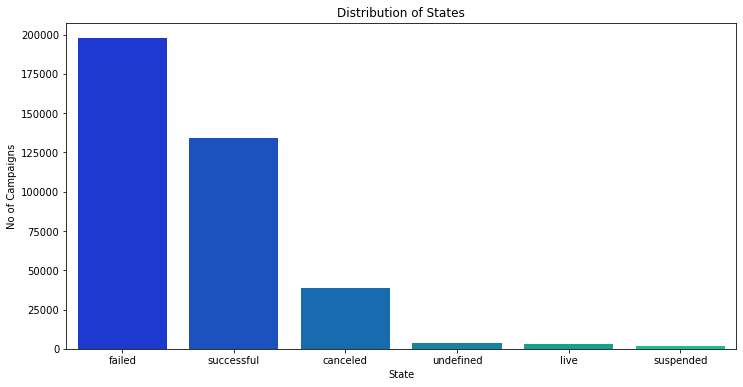

In [196]:
states = df.state.value_counts()

plt.figure(figsize=(12,6))
sns.barplot(
            x=states.index,
            y=states.values,
            palette="winter")

plt.title("Distribution of States")
plt.xlabel("State")
plt.ylabel("No of Campaigns") 
plt.show()
          


## Distribution of  Categories

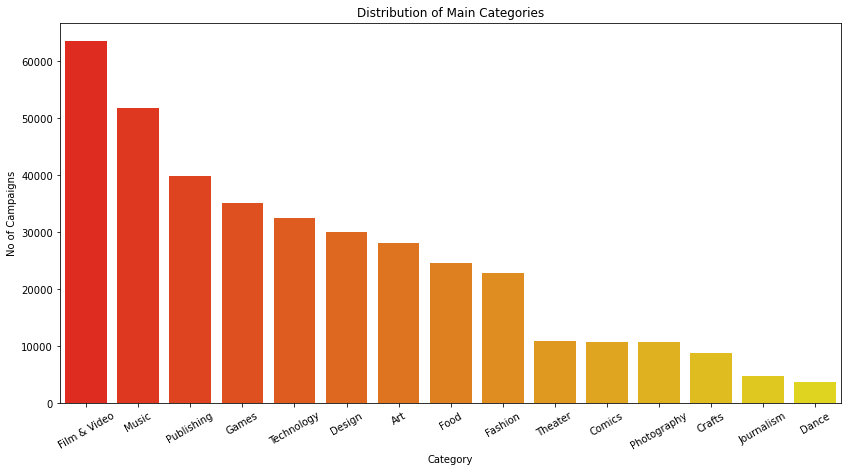

In [197]:
states = df.state.value_counts()

plt.figure(figsize=(14,7))
sns.barplot(
            x=df.main_category.value_counts().index, 
            y=df.main_category.value_counts().values,
            palette='autumn' )

plt.xticks(rotation=30)
plt.title("Distribution of Main Categories")
plt.xlabel("Category")
plt.ylabel("No of Campaigns") 
plt.show()

## Distribution of Top 30 Categories

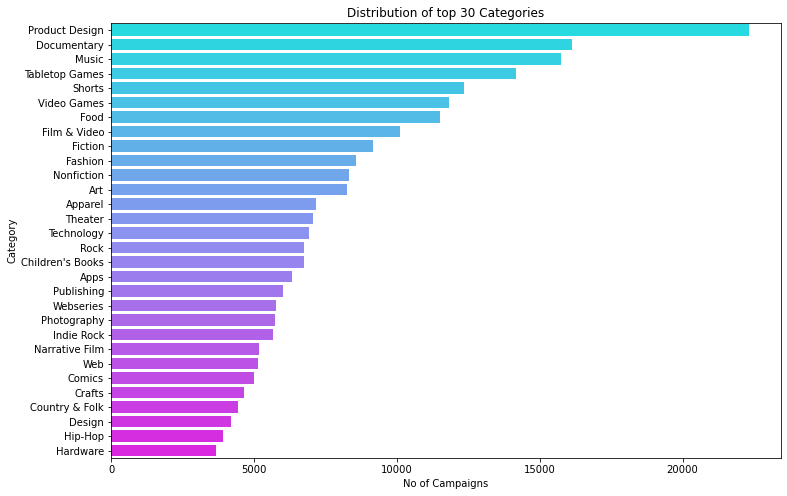

In [198]:
states = df.state.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(
            y=df.category.value_counts()[:30].index,
            x=df.category.value_counts()[:30].values,
            palette='cool' )


plt.title("Distribution of top 30 Categories")
plt.ylabel("Category")
plt.xlabel("No of Campaigns") 
plt.show()

## Distribution of Countries

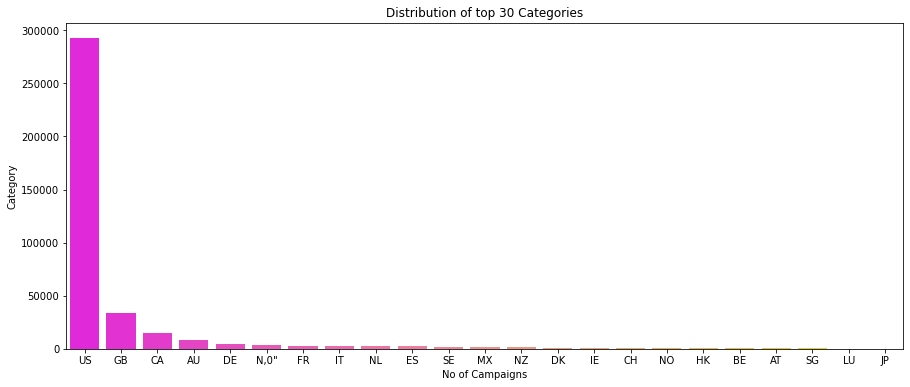

In [199]:
states = df.state.value_counts()

plt.figure(figsize=(15,6))
sns.barplot(
            x=df.country.value_counts().index,
            y=df.country.value_counts().values,
            palette='spring' )


plt.title("Distribution of Countries")
plt.ylabel("Category")
plt.xlabel("No of Campaigns") 
plt.show()

## Campaign Distribution over Years

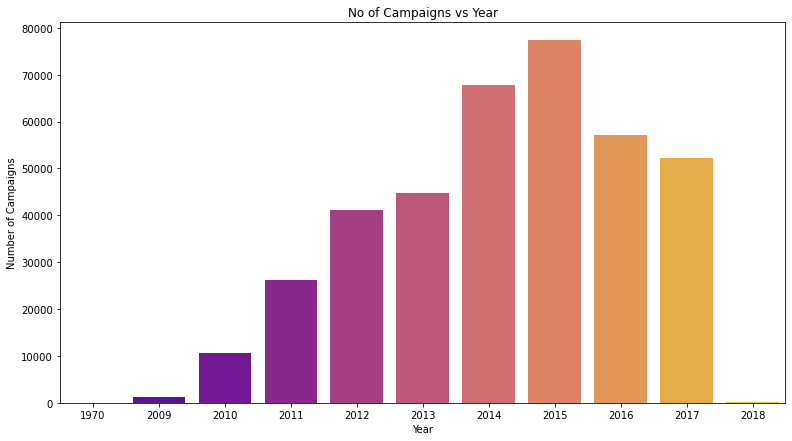

In [200]:
plt.figure(figsize=(13,7))
sns.countplot(df.launch_year, palette="plasma")
plt.xlabel("Year")
plt.ylabel("Number of Campaigns")
plt.title("No of Campaigns vs Year")
plt.show()

## Duration of Failed, Successful and Cancelled Campaigns

In [203]:
failed = df.loc[df.state=='failed']
successful = df.loc[df.state=='successful']
canceled = df.loc[df.state=='canceled']

ya = (["failed",'successful','canceled'])
ya

['failed', 'successful', 'canceled']

In [ ]:
xa = ([failed['duration_days'].mean()
,successful['duration_days'].mean()
,canceled['duration_days'].mean()])
xa

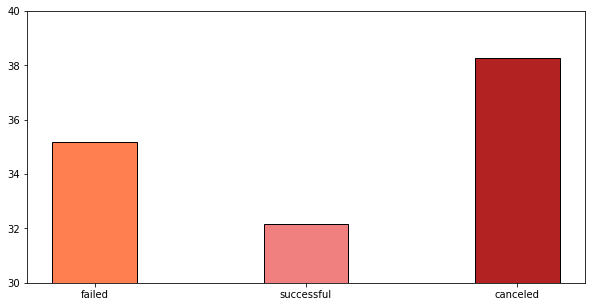

In [204]:
plt.figure(figsize=(10,5))
plt.bar(
    x=ya,height=xa,
    width=0.4,
    color=["coral", "lightcoral","firebrick"],
    edgecolor=["black"])
plt.ylim([30,40])
plt.show()

## Distribution of main categories in Sucessful & Failed Campaigns


In [ ]:
fig, axes = plt.subplots(1, 2,
figsize=(20, 7), sharey=True)
fig.suptitle('Distribution of main categories in Sucessful & Failed Campaigns')


s=sns.barplot(ax=axes[0],
            x=successful.main_category.value_counts().index,
            y=successful.main_category.value_counts().values,
            palette='spring')

f=sns.barplot(ax=axes[1],
            x=failed.main_category.value_counts().index,
            y=failed.main_category.value_counts().values,
            palette='winter' )

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=40)
    
s.set_title('Successful')
f.set_title('Failed')
    
plt.show()


## Distribution of Backers, Amount Pledged(USD), Goal of Campaign(USD), Duration(Days) according to Main Category of Successful Campaigns

In [ ]:
groupby_main_category = successful.groupby(['main_category']).mean()
groupby_main_category

In [ ]:
trace1 = go.Bar(
            x=groupby_main_category.backers.index,
            y=groupby_main_category.backers.values,
            opacity=0.65
        )

trace2 = go.Bar(
            x=groupby_main_category['usd pledged'].index,
            y=groupby_main_category['usd pledged'].values,
            opacity=0.65
        )
trace3 = go.Bar(
            x=groupby_main_category.usd_goal_real.index,
            y=groupby_main_category.usd_goal_real.values,
            opacity=0.65
        )

trace4 = go.Bar(
            x=groupby_main_category['duration_days'].index,
            y=groupby_main_category['duration_days'].values,
            opacity=0.65
        )
fig = tools.make_subplots(rows=2, cols=2, subplot_titles=('Backers', 'USD Pledged','USD Goal Real','Duration(days)'))
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)

fig['layout'].update(height=600, width=900, title='Distribution according to Main Category of Successful Campaigns')

iplot(fig)

## Relation in Successful Campaigns

### Relation between Backers and Pledged Amount(USD)

In [ ]:
plt.figure(figsize=(10,7))
sns.regplot(x='backers',y='usd pledged', data=successful)
plt.title("Relation between Backers and Pledged Amount(USD)")
plt.show()

### Relation between Duration(Days) and Pledged Amount(USD)

In [ ]:
plt.figure(figsize=(10,7))
sns.regplot(x='usd pledged',y='duration_days', data=successful)
plt.title("Relation between Duration(Days) and Pledged Amount(USD)")
plt.show()

## Success Measure

Create custom column called "success_measure" by dividing the Pledged Amount by the Goal of the Campaign which gives an idea of how many times the goal, the pledged amount was. To consider only serious campaigns I eliminated any campaign whose goal was below the median goal of all the campaigns and after that I got a list of the 10 most successful campaigns in Kickstarter

In [ ]:
successful['success_measure'] = successful['usd pledged']/successful['usd_goal_real']
successful_cleaned = successful[successful['usd_goal_real']>successful['usd_goal_real'].median()]
successful_cleaned.nlargest(10,'success_measure')

End of Analysis